# Homework 3 - Ahmet Kurt - 290201034



1.   I selected two photos taken from different angels and uploaded them to my GitHub repository.

      https://github.com/ahmetkurtms/ceng391/

2. I imported necessary libraries.

In [1]:
#Importing necessary libraries.
import matplotlib.pylab as plt
import numpy as np
from skimage import io
import cv2
import urllib.request
from google.colab.patches import cv2_imshow #cv2.imshow work with this import in Colab.

3. After importing, I fetched the images from GitHub and converted them to grayscale.

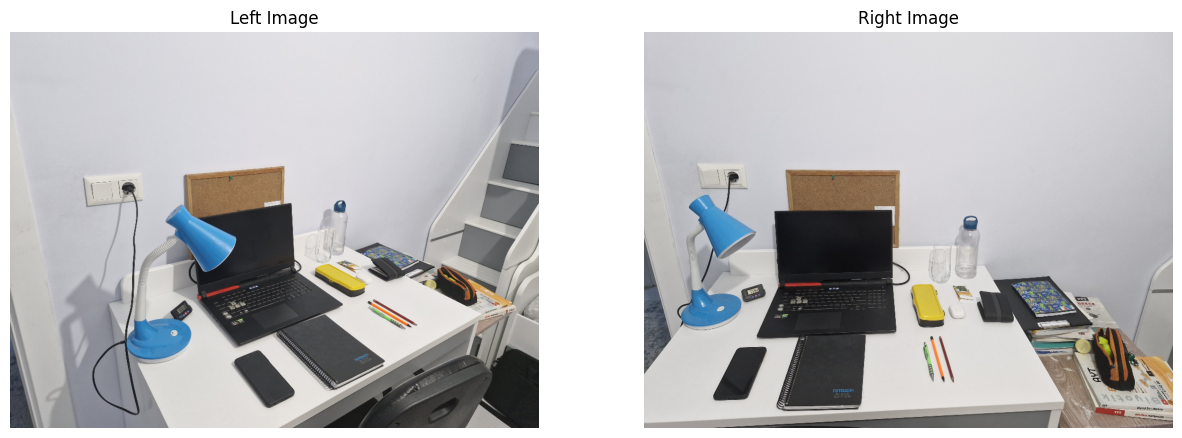

In [2]:
#Fetch and display the images from GitHub.
url1 = 'https://github.com/ahmetkurtms/ceng391/blob/main/hw3_1.jpeg?raw=true'
url2 = 'https://github.com/ahmetkurtms/ceng391/blob/main/hw3_2.jpeg?raw=true'

colorimgL = io.imread(url1)
colorimgR = io.imread(url2)
resized_imgL = cv2.resize(colorimgL, (1000, 750))
resized_imgR = cv2.resize(colorimgR, (1000, 750))

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(resized_imgL)
plt.title("Left Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_imgR)
plt.title("Right Image")
plt.axis('off')
plt.show()

4. After that I convert images to grayscale.

In [3]:
imgL = cv2.cvtColor(resized_imgL, cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(resized_imgR, cv2.COLOR_BGR2GRAY)

5. Using the SIFT method, I extracted keypoints and descriptors for each image.

In [4]:
sift = cv2.SIFT_create()
keypointsL, descriptorsL = sift.detectAndCompute(imgL, None)
keypointsR, descriptorsR = sift.detectAndCompute(imgR, None)

6. I visualized the keypoints.

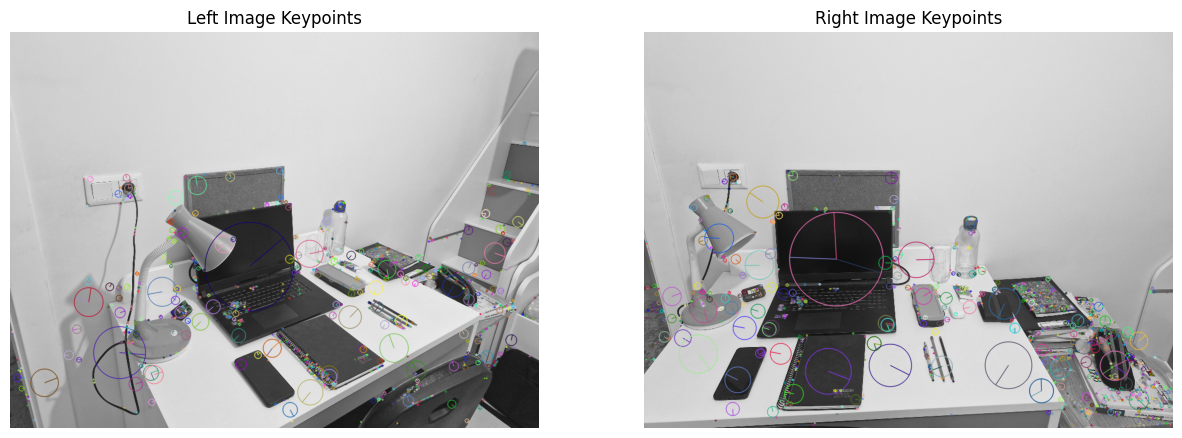

In [5]:
image_with_keypointsL = cv2.drawKeypoints(imgL, keypointsL, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_with_keypointsR = cv2.drawKeypoints(imgR, keypointsR, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

image_with_keypointsL_rgb = cv2.cvtColor(image_with_keypointsL, cv2.COLOR_BGR2RGB)
image_with_keypointsR_rgb = cv2.cvtColor(image_with_keypointsR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_with_keypointsL_rgb)
plt.title("Left Image Keypoints")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_keypointsR_rgb)
plt.title("Right Image Keypoints")
plt.axis('off')
plt.show()

7. To compare descriptors, I defined a cosine similarity function.

In [6]:
def cosine_similarity(a, b):
    dot_product = np.dot(a, b.T)
    norm_a = np.linalg.norm(a, axis=1, keepdims=True)
    norm_b = np.linalg.norm(b, axis=1, keepdims=True)
    return dot_product / (norm_a * norm_b.T)

8. Finding the best matches.
*   With the custom cosine similarity function, descriptors matched. I found 2 best matches from left to right, then filtered.



In [7]:
def find_best_matches(descL, descR, ratio_threshold=0.85):
    similarities = cosine_similarity(descL, descR)
    matches = []
    for i in range(similarities.shape[0]):
        best_match_idx = np.argmax(similarities[i])
        best_score = similarities[i, best_match_idx]
        similarities[i, best_match_idx] = -1
        second_best_score = np.max(similarities[i])

        # Ratio test
        if best_score / second_best_score > ratio_threshold:
            matches.append((i, best_match_idx))
    return matches

matches = find_best_matches(descriptorsL, descriptorsR, ratio_threshold=0.85)

9. Filtered matches.


In [8]:
translations = []
for match in matches:
    kpL = np.array(keypointsL[match[0]].pt)
    kpR = np.array(keypointsR[match[1]].pt)
    translations.append(kpR - kpL)

translations = np.array(translations)
translation_mean = np.mean(translations, axis=0)
translation_std = np.std(translations, axis=0)

filtered_matches = []
for match, translation in zip(matches, translations):
    if np.all(np.abs(translation - translation_mean) < translation_std * 1.5):
        filtered_matches.append(match)

10 Finally, I displayed the filtered matches on the original images.

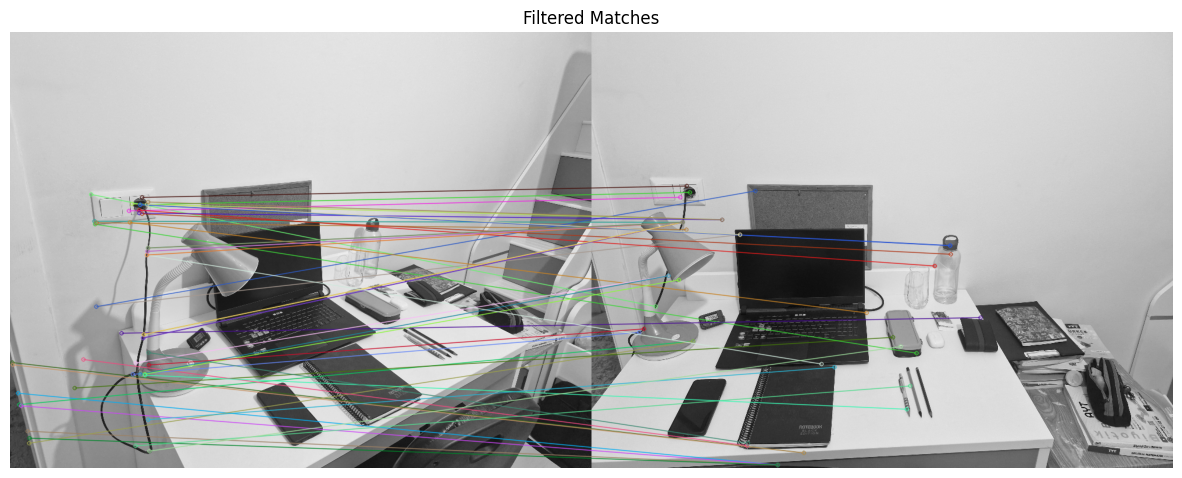

In [9]:
max_matches_to_display = 50
filtered_matches_limited = filtered_matches[:max_matches_to_display]

# Visualize the matches
img_matches = cv2.drawMatches(
    imgL, keypointsL, imgR, keypointsR,
    [cv2.DMatch(_queryIdx=i[0], _trainIdx=i[1], _distance=0) for i in filtered_matches_limited],
    None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
)

matched_img_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.imshow(matched_img_rgb)
plt.title("Filtered Matches")
plt.axis('off')
plt.show()

In [10]:
# End of the notebook.

# Some of the lines are false connected. I didn't understand maybe its because of
# my pictures angle.